In [ ]:
# first import stateful optimizer and all it's dependencies
from stateful_optim import *

In [0]:
data_bunch = get_data_bunch(*get_mnist_data(), batch_size=64)
loss_fn = CrossEntropy()

## Search Learning Rate

In [0]:
model = get_conv_final_model(data_bunch)
optimizer = adam_opt(model, learning_rate=1e-3, weight_decay=1e-4)
callbacks = [LearningRateSearch(min_lr=1e-5, max_lr=1e-2), Recorder()]

In [5]:
learner = Learner(data_bunch, model, loss_fn, optimizer, callbacks)
print(learner)

(DataBunch) 
    (DataLoader) 
        (Dataset) x: (50000, 784), y: (50000,)
        (Sampler) total: 50000, batch_size: 64, shuffle: True
    (DataLoader) 
        (Dataset) x: (10000, 784), y: (10000,)
        (Sampler) total: 10000, batch_size: 128, shuffle: False
(Model)
    Reshape(1, 28, 28)
    Conv(1, 4, 5, 2)
    AvgPool(2, 1)
    BatchNorm()
    Conv(4, 16, 3, 2)
    BatchNorm()
    Flatten()
    Linear(400, 64)
    ReLU()
    Linear(64, 10)
(CrossEntropy)
(StatefulOpt) steppers: ['adam', 'l2_reg'], stats: ['ExpWeightedGrad', 'ExpWeightedSqrGrad', 'StepCount']
(Callbacks) ['TrainEval', 'LearningRateSearch', 'Recorder']


In [0]:
learner.fit(1)

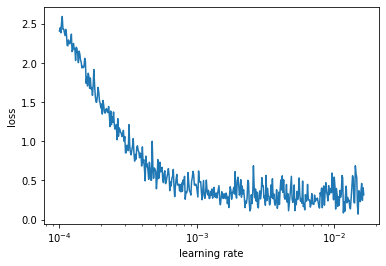

In [7]:
plot_lr_loss(learner.callbacks[2])

In [163]:
lr = learner.callbacks[1].lr
print(f'learning rate found: {lr}')

learning rate found: 0.004283273648329838


## Training

In [0]:
schedule = combine_schedules([0.4, 0.6], one_cycle_cos(lr/3, lr*3, lr/3))

In [0]:
model = get_conv_final_model(data_bunch)
optimizer = adam_opt(model, learning_rate=lr, weight_decay=1e-4)
callbacks = [ParamScheduler('learning_rate', schedule), StatsLogging(), Recorder()]

In [11]:
learner = Learner(data_bunch, model, loss_fn, optimizer, callbacks)
print(learner)

(DataBunch) 
    (DataLoader) 
        (Dataset) x: (50000, 784), y: (50000,)
        (Sampler) total: 50000, batch_size: 64, shuffle: True
    (DataLoader) 
        (Dataset) x: (10000, 784), y: (10000,)
        (Sampler) total: 10000, batch_size: 128, shuffle: False
(Model)
    Reshape(1, 28, 28)
    Conv(1, 4, 5, 2)
    AvgPool(2, 1)
    BatchNorm()
    Conv(4, 16, 3, 2)
    BatchNorm()
    Flatten()
    Linear(400, 64)
    ReLU()
    Linear(64, 10)
(CrossEntropy)
(StatefulOpt) steppers: ['adam', 'l2_reg'], stats: ['ExpWeightedGrad', 'ExpWeightedSqrGrad', 'StepCount']
(Callbacks) ['TrainEval', 'ParamScheduler', 'StatsLogging', 'Recorder']


In [175]:
learner.fit(3)

Epoch - 1
train metrics - [5.624208450317383e-06, 0.89082]
valid metrics - [2.2692584991455077e-05, 0.9622]

Epoch - 2
train metrics - [6.513986587524414e-06, 0.95746]
valid metrics - [2.0359230041503905e-05, 0.9706]

Epoch - 3
train metrics - [6.942987442016601e-06, 0.96688]
valid metrics - [1.5890932083129882e-05, 0.9731]



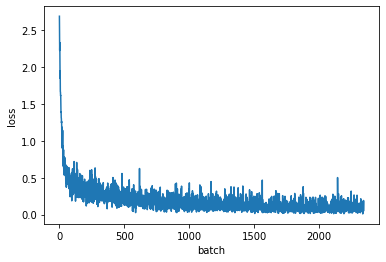

In [159]:
learner.callbacks[3].plot_losses()

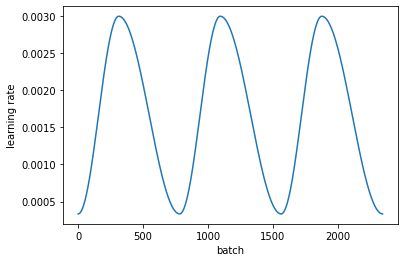

In [176]:
learner.callbacks[3].plot_parameter('learning_rate')